# Лабораторная работа №2. Моделирование дискретных СВ. 

# Дроздова Юлия
## Вариант 3

Смоделировать дискретную случайную величину (задания на стр. 18-22). Исследовать точность моделирования.

1)	Осуществить моделирование n = 1000 реализаций СВ из заданных дискретных распределений. \
2)	Вывести на экран несмещенные оценки математического ожидания и дисперсии, сравнить их с истинными значениями. \
3)	Для каждой из случайных величин построить свой χ2-критерием Пирсона с уровнем значимость ε=0.05. Проверить, что вероятность ошибки I рода стремится к 0.05.\
4)	Осуществить проверку каждой из сгенерированных выборок каждым из построенных критериев.


In [1]:
# Критерий Пирсона

import math
import matplotlib.pyplot as plt
import scipy.stats as sps

def pirson_stat(values, intervals, distribution, param1):
    stat = 0
    step = (max(values) - min(values)) / intervals

    x = min(values)
    y = x + step
    for i in range(1, INTERVALS):
        observed = 0
        for val in values:
            if x < val <= y:
                observed += 1

        expected = len(values) * (distribution(y, param1) - distribution(x, param1))
        stat += ((observed - expected) ** 2 + 1e-9) / (expected + 1e-9)
        x = y
        y += step

    return stat

In [2]:
# Функции распределения

def poiss_func(x, p):
    return sps.poisson.cdf(mu =p, k = x)

def bern_func(x, p):
    return sps.bernoulli.cdf(p=p, k=x)

Распределение Бернулли:
Истинное математическое ожидание: 0.600000. Полученное в результате моделирования: 0.604000
Истинная дисперсия: 0.240000. Полученная в результате моделирования: 0.239184
Критерий Пирсона: 19.000000, квантиль: 31.400000
Распределение Пуассона:
Истинное математическое ожидание: 0.500000. Полученное в результате моделирования: 0.516000
Истинная дисперсия: 0.500000. Полученная в результате моделирования: 0.519744
Критерий Пирсона: 17.255236, квантиль: 31.400000


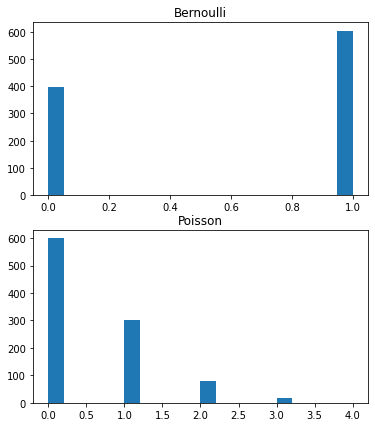

In [3]:
INTERVALS = 20
PIRSON_QUANTIL = 31.4
N = 1
P = 0.6

data_bern = sps.bernoulli(P).rvs(1000)
E = sum(data_bern) / len(data_bern)
D = sum(math.pow(x - E, 2) for x in data_bern) / len(data_bern)
print('Распределение Бернулли:')
print('Истинное математическое ожидание: %f. Полученное в результате моделирования: %F' % (P, E))
print('Истинная дисперсия: %f. Полученная в результате моделирования: %f' % (P * (1 - P), D))
pirson = pirson_stat(data_bern, INTERVALS, bern_func, P)
print("Критерий Пирсона: %f, квантиль: %f" % (pirson, PIRSON_QUANTIL))

P = 0.5
data_poiss = sps.poisson(P).rvs(1000)
E = sum(data_poiss) / len(data_poiss)
D = sum(math.pow(x - E, 2) for x in data_poiss) / len(data_poiss)
print('Распределение Пуассона:')
print('Истинное математическое ожидание: %f. Полученное в результате моделирования: %F' % (P, E))
print('Истинная дисперсия: %f. Полученная в результате моделирования: %f' % (P, D))
pirson = pirson_stat(data_poiss, INTERVALS, poiss_func, 0.5)
print("Критерий Пирсона: %f, квантиль: %f" % (pirson, PIRSON_QUANTIL))

figure, axis = plt.subplots(2)
figure.set_figheight(7)

axis[0].hist(data_bern, 20)
axis[0].set_title("Bernoulli")

axis[1].hist(data_poiss, 20)
axis[1].set_title("Poisson")
plt.show()